# Matplotlib image tutorial

This is a partial of the official [matplotlib introductory image tutorial](https://matplotlib.org/tutorials/introductory/images.html) in the form of a notebook.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [52]:
img = mpimg.imread('data/stinkbug.png')
img.shape

(375, 500, 3)

In [53]:
s = 3
print(img[:s,:s:,0])
print(img[:s,:s:,1])
print(img[:s,:s:,2])

[[ 0.40784314  0.40784314  0.40784314]
 [ 0.41176471  0.41176471  0.41176471]
 [ 0.41960785  0.41568628  0.41568628]]
[[ 0.40784314  0.40784314  0.40784314]
 [ 0.41176471  0.41176471  0.41176471]
 [ 0.41960785  0.41568628  0.41568628]]
[[ 0.40784314  0.40784314  0.40784314]
 [ 0.41176471  0.41176471  0.41176471]
 [ 0.41960785  0.41568628  0.41568628]]


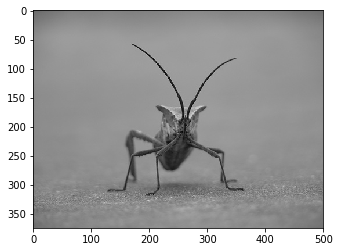

In [54]:
plt.imshow(img);

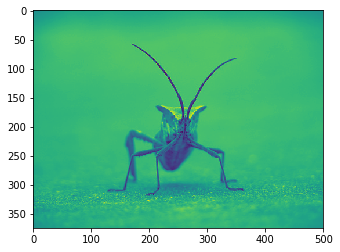

In [55]:
lum_img = img[:,:,0]
fig, ax = plt.subplots()
imgplot = ax.imshow(lum_img)

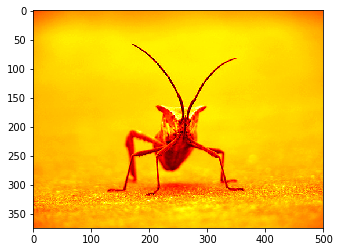

In [56]:
imgplot.set_cmap('hot')
imgplot.figure

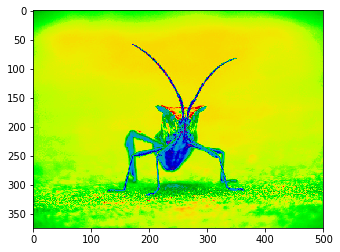

In [57]:
imgplot.set_cmap('nipy_spectral')
imgplot.figure

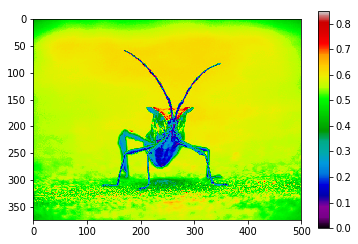

In [58]:
imgplot.set_cmap('nipy_spectral')
fig.colorbar(imgplot)
fig

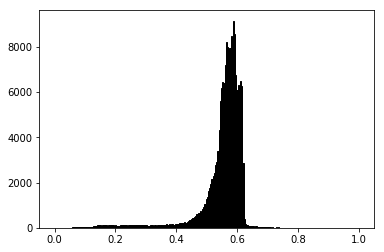

In [59]:
plt.hist(lum_img.flatten(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

Most often, the “interesting” part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there’s not much useful information in the high end (not many white things in the image). Let’s adjust the upper limit, so that we effectively “zoom in on” part of the histogram. We do this by setting the the `clim` for the plot:

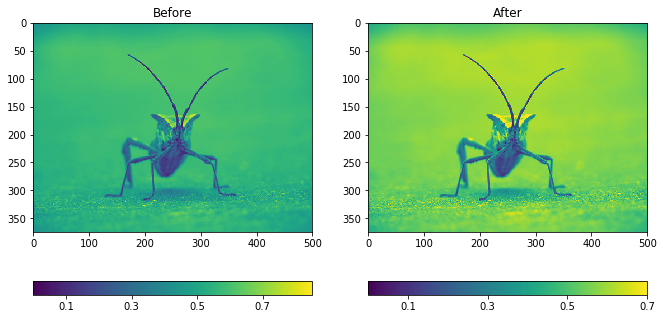

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

imgplot1 = ax1.imshow(lum_img)
ax1.set_title('Before')
fig.colorbar(imgplot1, ax=ax1, ticks=[0.1, 0.3, 0.5, 0.7], orientation ='horizontal')

imgplot2 = ax2.imshow(lum_img)
imgplot2.set_clim(0.0, 0.7)   # Set the color limits manually
ax2.set_title('After')
fig.colorbar(imgplot2, ax=ax2, ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal');

With [scikit-image](http://scikit-image.org), we can quickly manipulate our image and for example make a small version of it:

In [61]:
from skimage import io, transform

rs = transform.rescale(img, 1/10)
rs.shape

/Users/fperez/usr/conda/envs/s159/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(38, 50, 3)

The [Python Imaging Library - Pillow](https://pillow.readthedocs.io) also lets us maninpulate the images, and it provides functionality that is complementary to scikit-image:

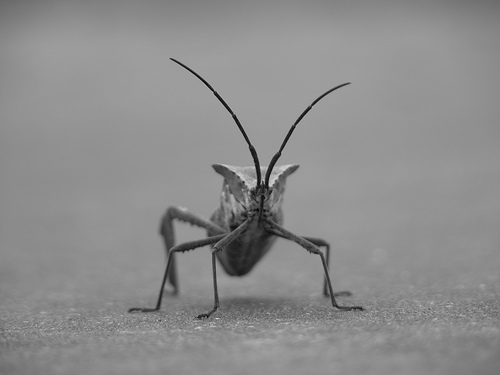

In [63]:
from PIL import Image
img = Image.open('data/stinkbug.png')    # Open image as PIL image object
img

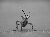

In [64]:
rsize = img.resize((np.array(img.size)/10).astype(int)) # Use PIL to resize
rsize

In [65]:
rsizeArr = np.asarray(rsize)  # Get array back
rsizeArr.shape

(37, 50, 3)

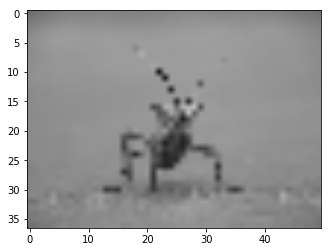

In [66]:
imgplot = plt.imshow(rsizeArr, interpolation='bilinear')

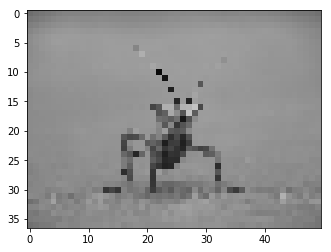

In [67]:
imgplot.set_interpolation('nearest')
imgplot.figure

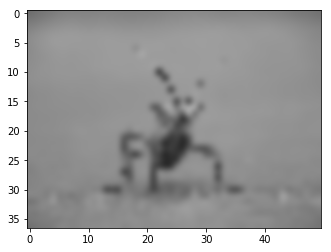

In [68]:
imgplot.set_interpolation('bicubic')
imgplot.figure

# Multichannel images

In [69]:
sg = mpimg.imread('data/stained_glass_barcelona.png')
sg.shape

(1200, 628, 4)

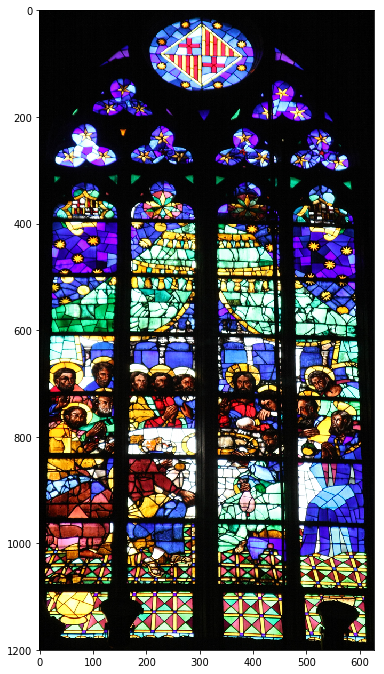

In [79]:
plt.rcParams['figure.figsize'] = (6, 12)
plt.imshow(sg);

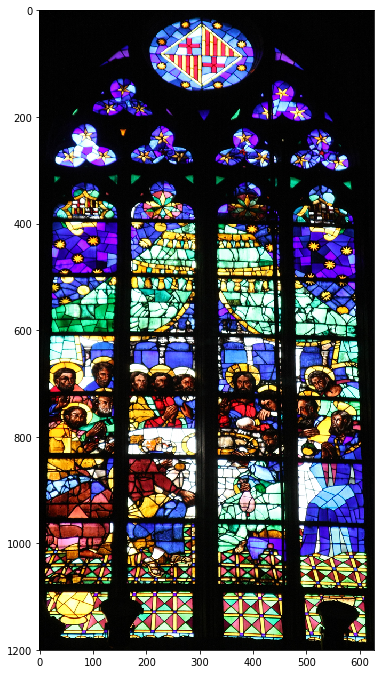

In [81]:
plt.imshow(sg[:,:,:3]);

In [82]:
np.unique(sg[:,:,3])

array([ 0.99607843,  1.        ], dtype=float32)

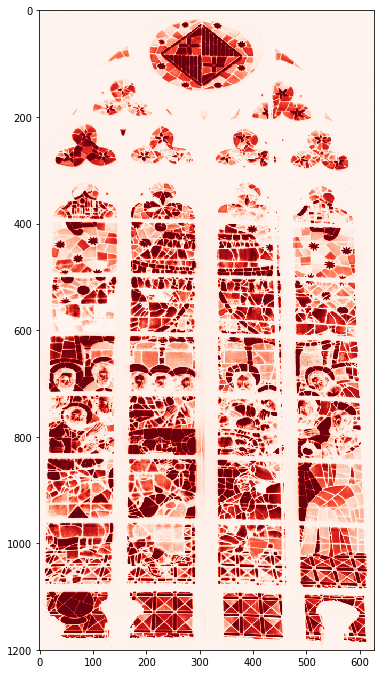

In [83]:
plt.imshow(sg[:,:,0], cmap='Reds');